In [1]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime

In [2]:
df = pd.read_csv('raw_analyst_ratings.csv')
df["new_date"] = pd.to_datetime(df.date, utc=True).dt.date
df.head()

,Unnamed: 0,headline,url,publisher,date,stock,new_date
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,2020-05-22


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
 6   new_date    1407328 non-null  object
dtypes: int64(1), object(6)
memory usage: 75.2+ MB


In [5]:
# Number of headline per publisher
publisher_by_headline = df.groupby('publisher')['headline'].nunique().reset_index()
publisher_by_headline.head(10)

,publisher,headline
0,47ertrends,2
1,AARP,2
2,ABNNewswire,10
3,Aakin,4
4,Aaron Jackson.Ed,6
5,Aaron Levitt,150
6,Abe Raymond,657
7,Abhi Rao,60
8,Abigail Field,11
9,Above Average Odds,14


In [6]:
# Grouping count of headline by date
df2 = df[df['date'].between('2020-01-01', '2021-01-01')]
time_series_data = df2[df2['stock'] == 'AAPL'].groupby('new_date')['headline'].nunique().reset_index()
time_series_data =  time_series_data.set_index(['new_date'])
time_series_data.head(15)

,headline
new_date,
2020-03-09,3
2020-03-10,8
2020-03-11,14
2020-03-12,5
2020-03-13,11
2020-03-14,2
2020-03-15,4
2020-03-16,11
2020-03-17,12


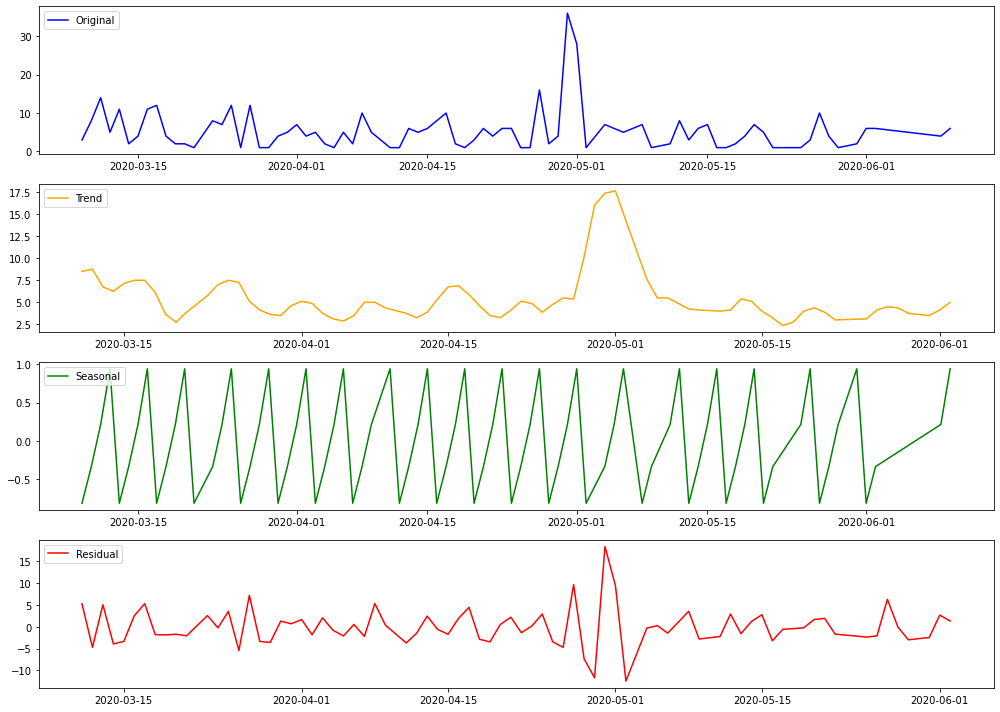

In [45]:
# plotting the number of headline by date for the time series 
decomposition = seasonal_decompose(time_series_data['headline'], model='additive', period=4)

plt.figure(figsize=(14,10))

plt.subplot(411)
plt.plot(time_series_data['headline'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [7]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\micke\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
sentiment_data = df.copy()

In [9]:
sia = SentimentIntensityAnalyzer()

In [10]:
# Getting the polarity_score for the headline to determine the sentimenet category 
sentiment_data['sentiment'] = sentiment_data['headline'].apply(lambda x: sia.polarity_scores(text=x)['compound'])
sentiment_data.head(15)

,Unnamed: 0,headline,url,publisher,date,stock,new_date,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05,0.000
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03,0.000
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26,0.000
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22,0.000
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,2020-05-22,0.296
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A,2020-05-22,-0.128
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A,2020-05-22,0.000
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A,2020-05-22,0.296
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A,2020-05-22,-0.128
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A,2020-05-22,0.000


In [8]:
# Assigning label to polarity score
bins = [-1, -0.5, -0.0001, 0.5, 1]
labels=['Very Negative', 'Negative', 'Neutral', 'Positive']
sentiment_data['sentiment_category'] = pd.cut(sentiment_data['sentiment'], bins=bins, labels=labels)

In [9]:
sentiment_data['sentiment_category'].value_counts()

Neutral          1070915
Negative          182864
Positive          109718
Very Negative      43831
Name: sentiment_category, dtype: int64

In [48]:
# Count of sentiment_category by publisher
publisher_by_category = sentiment_data.groupby(['publisher', 'sentiment_category'])['headline'].nunique().reset_index()
publisher_by_category_pivoted = publisher_by_category.pivot(index='publisher', columns='sentiment_category', values=['headline']) 
publisher_by_category_pivoted

In [51]:
publisher_categ = pd.merge(publisher_by_category_pivoted, publisher_by_headline, on="publisher")
publisher_categ

C:\Users\micke\AppData\Local\Temp/ipykernel_12792/961406909.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  publisher_categ = pd.merge(publisher_by_category_pivoted, publisher_by_headline, on="publisher")


,publisher,"(headline, Very Negative)","(headline, Negative)","(headline, Neutral)","(headline, Positive)",headline
0,47ertrends,0,0,2,0,2
1,AARP,0,0,2,0,2
2,ABNNewswire,0,4,6,0,10
3,Aakin,0,0,4,0,4
4,Aaron Jackson.Ed,0,1,3,2,6
...,...,...,...,...,...,...
1029,vic@forextraininggroup.com,0,0,1,0,1
1030,vishwanath@benzinga.com,1,856,939,34,1830
1031,vivek.proactive@gmail.com,0,45,74,1,120
1032,wallstreet1928,0,1,7,0,8


In [76]:
# calculating percentage of sentiment_category by headline count by publisher
publisher_categ['very_negetive_percent'] = (publisher_categ[publisher_categ.columns[1]].astype('float') / publisher_categ['headline'].astype('float')) * 100
publisher_categ['negetive_percent'] = (publisher_categ[publisher_categ.columns[2]].astype('float') / publisher_categ['headline'].astype('float')) * 100
publisher_categ['neutral_percent'] = (publisher_categ[publisher_categ.columns[3]].astype('float') / publisher_categ['headline'].astype('float')) * 100
publisher_categ['positive_percent'] = (publisher_categ[publisher_categ.columns[4]].astype('float') / publisher_categ['headline'].astype('float')) * 100